Connect to Google Drive to import data, then load packages and read in the data. The data consists of:

*   Features-82 principal components for ~1000 placental genes associated with neurodevelopmental disorders
*   Target- ROST score, a childhood cognitive measure. Here the raw ROST score is used, which is a continous variable
*   Primary interest in this analysis is the variance explained by the PCs in the ROST variable.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


file_path = '/content/drive/My Drive/Colab Notebooks/PC_ROST_cont.csv'
data = pd.read_csv(file_path)
data.sample(4)

Mounted at /content/drive


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,ROST_total_score
75,4.770000e-15,1.800000e-15,1.720000e-15,-2.400000e-16,-5.440000e-16,-2.080000e-15,3.780000e-16,-1.340000e-16,-1.140000e-15,-4.540000e-17,...,-4.540000e-17,4.820000e-16,-7.650000e-16,-1.980000e-16,2.560000e-16,1.510000e-16,-1.190000e-16,-2.570000e-16,-2.010000e-17,9
77,-3.292263e+00,-4.926545e+00,-2.777199e+00,-3.677167e-01,-8.717676e-01,-1.756908e+00,1.909043e+00,1.925753e+00,2.438873e-01,7.264061e-03,...,2.361044e-01,4.566816e-01,-1.902221e-01,6.754060e-01,6.403007e-01,-1.302191e-01,1.445607e-01,-4.911761e-01,7.908007e-01,4
50,-3.047854e-01,-8.364320e+00,-3.590127e-01,3.262701e+00,-1.176858e-01,1.706443e-01,1.596879e+00,2.508528e+00,3.658079e+00,3.862342e+00,...,3.786117e-01,3.219548e-01,4.031411e-01,2.473452e-01,1.829393e-01,9.929453e-01,-3.423171e-02,-7.648756e-01,3.410421e-01,2
8,4.330956e-01,-3.256062e+00,-3.838727e+00,2.267027e+00,-4.155092e+00,8.436404e-01,-4.403781e-01,7.894050e-01,-1.545129e-01,5.746931e-01,...,-1.227805e+00,-2.223794e-01,3.004091e-01,-1.103644e-01,3.331168e-01,2.146733e-01,1.817529e-01,3.306336e-01,3.059700e-01,8


ID predictors and outcomes

In [4]:
X = data.drop('ROST_total_score', axis=1)
y = data['ROST_total_score']


Run an elastic net regression to identify salient features. In the original dataset there are more features than observations, which won't work. Here, I'm using a 5-fold cross validation approach and a variety of L1 variables and alpha's. The model will determine the best parameters and refit the final model using those parameters.


No need to set up test/train sets because the goal here is to identify the variance explained and see if it is the same as in the R script.

In [6]:
elastic_net = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=100, cv=5, random_state=42)
elastic_net.fit(X,y)

print("Best alpha: ", elastic_net.alpha_)
print("Best l1_ratio: ", elastic_net.l1_ratio_)
print("Coefficients: ", elastic_net.coef_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.297e-02, tolerance: 7.019e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.903e-02, tolerance: 7.240e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.039e-02, tolerance: 7.240e

Best alpha:  0.6589397352390987
Best l1_ratio:  1.0
Coefficients:  [ 0.11014101  0.10209452  0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.          0.20159397 -0.          0.         -0.         -0.
 -0.          0.         -0.          0.          0.          0.
 -0.          0.         -0.          0.          0.         -0.16505721
  0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.          0.          0.
 -0.          0.         -0.         -0.        ]


Plot coefficents

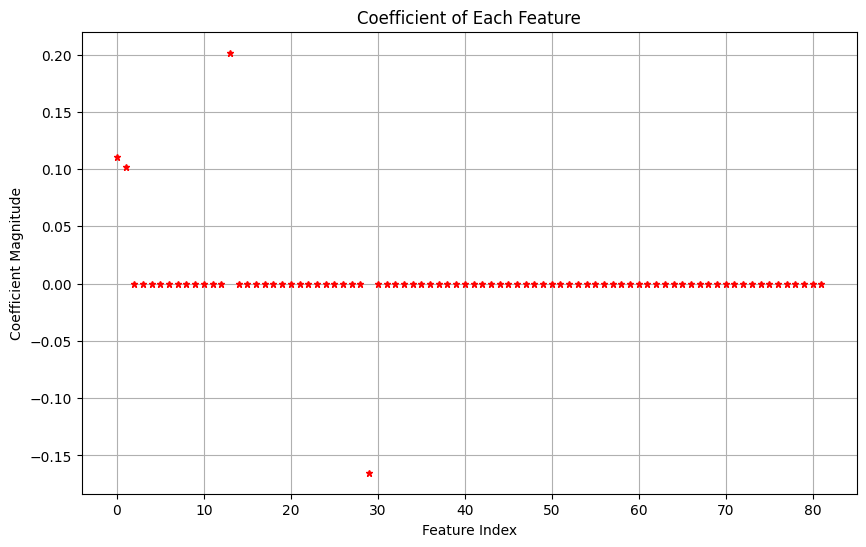

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(elastic_net.coef_, linestyle='none', marker='*', markersize=5, color='red', zorder=7)
plt.title('Coefficient of Each Feature')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.grid(True)
plt.show()


Extract the features deemed important from the elastic net regression previously

In [8]:
# Extracting non-zero coefficients
non_zero_features = np.where(elastic_net.coef_ != 0)[0]
print("Features with non-zero coefficients:", non_zero_features)



Features with non-zero coefficients: [ 0  1 13 29]


Filter the data to only include those features

In [9]:
# Filter original data to keep only non-zero features
X_reduced = X.iloc[:, non_zero_features]


In [10]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_reduced, y)


LinearRegression()

In [11]:
# Predicting using the reduced test data
y_pred_reduced = linear_model.predict(X_reduced)

# Calculate MSE for the reduced model
mse_reduced = mean_squared_error(y, y_pred_reduced)
print(f'Mean Squared Error of the reduced model: {mse_reduced}')


Mean Squared Error of the reduced model: 7.945724156522342


In [14]:
import statsmodels.api as sm

# Adding a constant to the model for the intercept
X_reduced_sm = sm.add_constant(X_reduced)
model_sm = sm.OLS(y, X_reduced_sm)

results = model_sm.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:       ROST_total_score   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.356
Date:                Tue, 14 May 2024   Prob (F-statistic):           0.000685
Time:                        12:34:00   Log-Likelihood:                -218.52
No. Observations:                  89   AIC:                             447.0
Df Residuals:                      84   BIC:                             459.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1835      0.312     16.611      0.0